In [77]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 
import calendar
import seaborn as sns

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



In [78]:
df_US = df[df["job_country"] == "United States"].copy()


In [79]:
df_skills = df_US.explode("job_skills")

In [80]:
df_skills_count = df_skills.groupby(["job_skills", "job_title_short"]).size()
df_skills_count = df_skills_count.reset_index(name="skill_count").sort_values(by=["job_title_short", "skill_count"], ascending=False)

In [81]:
df_skills_count

,job_skills,job_title_short,skill_count
1528,sql,Software Engineer,727
1214,python,Software Engineer,699
694,java,Software Engineer,372
1618,tableau,Software Engineer,333
129,aws,Software Engineer,320
...,...,...,...
1539,sqlite,Business Analyst,1
1548,sqlserver,Business Analyst,1
1649,theano,Business Analyst,1
1785,vue.js,Business Analyst,1


In [82]:
job_titles = ["Data Analyst", "Data Scientist", "Data Engineer"]

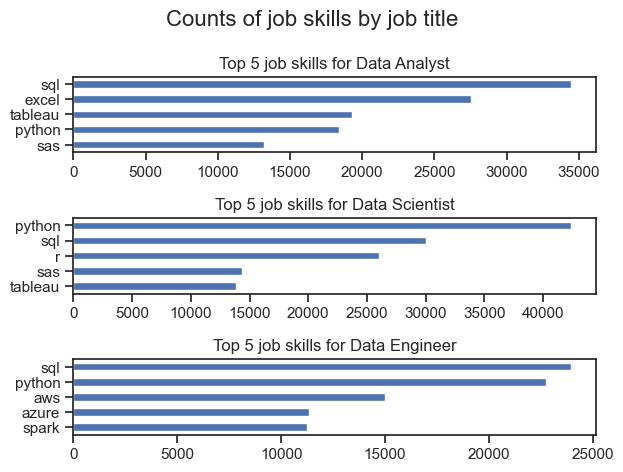

In [83]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count["job_title_short"] == job].head(5)
    df_plot.plot(kind="barh", x="job_skills", y="skill_count", title=f"Top 5 job skills for {job}", ax=ax[i])

    ax[i].invert_yaxis()
    ax[i].set_ylabel("")
    ax[i].legend().set_visible(False)


fig.suptitle("Counts of job skills by job title", fontsize=16)
plt.tight_layout()
plt.show()

In [84]:
df_total_jobs = df_US.value_counts(["job_title_short"]).reset_index(name = "jobs_total")

In [85]:
df_megrged = pd.merge(df_skills_count, df_total_jobs, how = "left",on="job_title_short")

In [86]:
df_megrged["skill_percent"] = df_megrged["skill_count"] / df_megrged["jobs_total"] * 100

In [87]:
job_titles

['Data Analyst', 'Data Scientist', 'Data Engineer']

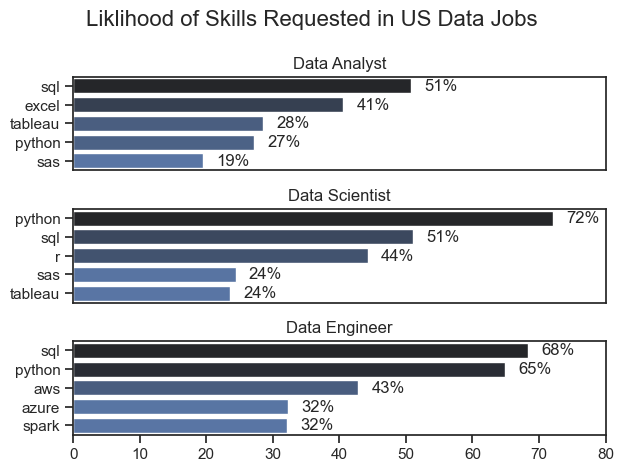

In [88]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style="ticks")

for i, job in enumerate(job_titles):
    df_plot = df_megrged[df_megrged["job_title_short"] == job].head(5)

    sns.barplot(data = df_plot, x="skill_percent", y="job_skills", ax=ax[i], hue="skill_percent", palette="dark:b_r")

    ax[i].set_title(job)
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")
    ax[i].legend().remove()
    ax[i].set_xlim(0, 80)
    for n,v in enumerate(df_plot["skill_percent"]):
        ax[i].text(v + 2, n, f'{v:.0f}%', va='center')

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])


fig.suptitle("Liklihood of Skills Requested in US Data Jobs", fontsize=16)
plt.tight_layout()
plt.show()